In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
print(np.__version__)
print(matplotlib.__version__)

1.19.2
3.3.2


In [3]:
# 설치가 안되어 있을 경우, 설치 필요.
import mglearn
import sklearn
print( sklearn.__version__)
print( mglearn.__version__)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

0.23.2
0.1.9


w[0]: 0.393906  b: -0.031804


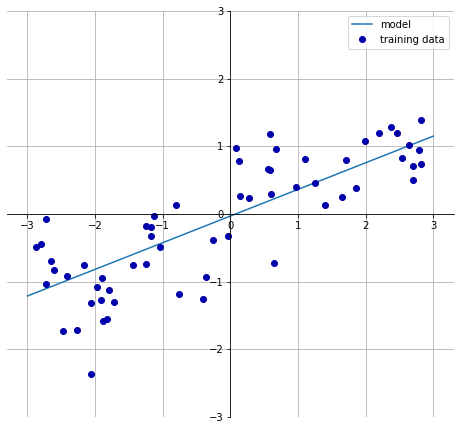

In [4]:
mglearn.plots.plot_linear_regression_wave()

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

In [7]:
boston = load_boston()
X = boston.data       # 입력 데이터  - 문제
y = boston.target     # 출력 데이터  - 답

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

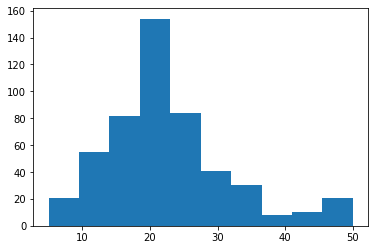

In [8]:
plt.hist(y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                           random_state=42)

In [11]:
model = LinearRegression().fit(X_train, y_train)   # 학습
pred = model.predict(X_test)
pred

array([28.83885359, 36.00783288, 15.08324755, 25.23090886, 18.87864064,
       23.21398327, 17.5931124 , 14.30508093, 23.05438985, 20.62008346,
       24.78514683, 18.66833668, -6.9788951 , 21.83575737, 19.20898992,
       26.2868054 , 20.54379176,  5.65713224, 40.42358065, 17.64146116,
       27.32258958, 30.05056174, 11.15013704, 24.11530393, 17.89145648,
       15.79348591, 22.94743453, 14.2586068 , 22.26731194, 19.24709013,
       22.26897546, 25.24344002, 25.69165643, 17.98759507, 16.70286649,
       17.11631225, 31.19643534, 20.17835831, 23.71828436, 24.79196868,
       13.94575895, 32.00389982, 42.53869791, 17.44523722, 27.15354457,
       17.07482215, 13.89272021, 26.06440323, 20.36888769, 29.97813037,
       21.35346608, 34.32287916, 15.88498671, 26.17757739, 39.50970314,
       22.84123308, 18.95049088, 32.68913818, 25.02057949, 12.90539147,
       22.76052302, 30.53884316, 31.60797905, 15.92162168, 20.50670563,
       16.50798147, 20.50202198, 26.00723901, 30.63860954, 11.42

In [12]:
import pandas as pd
# MAE, MSE, RMSE, 

In [13]:
dict_dat = {"실제값":y_test, "예측값":pred, "오차":y_test - pred}
dat = pd.DataFrame(dict_dat )
dat

,실제값,예측값,오차
0,23.6,28.838854,-5.238854
1,32.4,36.007833,-3.607833
2,13.6,15.083248,-1.483248
3,22.8,25.230909,-2.430909
4,16.1,18.878641,-2.778641
...,...,...,...
122,8.8,3.284209,5.515791
123,19.2,23.798796,-4.598796
124,25.3,25.733299,-0.433299
125,20.4,23.048156,-2.648156


In [15]:
dat['오차절대값'] = abs(dat['오차'])
dat['오차제곱'] = dat['오차'] ** (2)
dat

,실제값,예측값,오차,오차절대값,오차제곱
0,23.6,28.838854,-5.238854,5.238854,27.445587
1,32.4,36.007833,-3.607833,3.607833,13.016458
2,13.6,15.083248,-1.483248,1.483248,2.200023
3,22.8,25.230909,-2.430909,2.430909,5.909318
4,16.1,18.878641,-2.778641,2.778641,7.720844
...,...,...,...,...,...
122,8.8,3.284209,5.515791,5.515791,30.423951
123,19.2,23.798796,-4.598796,4.598796,21.148926
124,25.3,25.733299,-0.433299,0.433299,0.187748
125,20.4,23.048156,-2.648156,2.648156,7.012731


In [16]:
# R^2의 값을 구하기- 결정계수 구하기
print("훈련 데이터 세트 점수 : {:.2f}".format(model.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.2f}".format(model.score(X_test, y_test)))

훈련 데이터 세트 점수 : 0.75
테스트 데이터 세트 점수 : 0.68


### 선형모델 과적합 현상

* 변수가 많을 때, 
  * 다중 공선성

* 과적합이 일어날 때, w계수값을 제한을 가해준다.

* 랏소회귀(L1) : w의 값들을 0에 가깝게 해요. 어떤 친구는 0이 되어 버린다.
    * 변수를 없애는것. 영향력이 작은 친구는 없앤다.
    
* 릿지회귀(L2) : w의 값들을 0에 가깝게 해요. 어떠한 친구도 0이 되지 않는다.
    * 모든 변수를 살린다.

In [17]:
import mglearn

In [18]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
import pandas as pd

In [22]:
boston = load_boston()
print(type(boston.target), type(boston.data))
print(boston.target.shape, boston.data.shape)

df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston['price'] = boston.target
df_boston

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(506,) (506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [23]:
### 데이터 준비
### 입력, 출력 나누고, 
### 전처리 및 특징(feature) 추출, 데이터 분리
### 모델 선택, 학습, 예측
### 평가 

In [24]:
X = df_boston.loc[ : , 'CRIM':'LSTAT'  ]
y = boston.target

X.shape, y.shape

((506, 13), (506,))

In [51]:
nor_X = MinMaxScaler().fit_transform(X)
ex_X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(nor_X)
ex_X.shape

(506, 104)

### 데이터 나누기

In [57]:
X_train, X_test, y_train, y_test = train_test_split(ex_X, y, 
                                                    random_state=42)

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
model = LinearRegression()
model.fit(X_train, y_train)
print("학습용 데이터 결정계수 : {:.2f}".format(model.score(X_train, y_train)))
print("테스트 데이터 결정계수 : {:.2f}".format(model.score(X_test, y_test)))

학습용 데이터 결정계수 : 0.94
테스트 데이터 결정계수 : 0.78


In [60]:
from sklearn.linear_model import Ridge, Lasso

In [61]:
model = Ridge(alpha=0.1).fit(X_train, y_train)
print("학습용 데이터 세트 결정계수 : {:.2f}".format(model.score(X_train, y_train)))
print("테스트 데이터 세트 결정계수 : {:.2f}".format(model.score(X_test, y_test)))

학습용 데이터 세트 결정계수 : 0.92
테스트 데이터 세트 결정계수 : 0.82


In [65]:
model = Lasso(alpha=0.01).fit(X_train, y_train)
print("학습용 데이터 세트 결정계수 : {:.2f}".format(model.score(X_train, y_train)))
print("테스트 데이터 세트 결정계수 : {:.2f}".format(model.score(X_test, y_test)))

학습용 데이터 세트 결정계수 : 0.89
테스트 데이터 세트 결정계수 : 0.80


C:\Users\front\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.848133364149362, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(


In [74]:
ridge001 = Ridge(alpha=0.01).fit(X_train, y_train)
print(ridge001)
print("훈련 세트 점수 : {:.2f}".format(ridge001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge001.score(X_test, y_test)))

Ridge(alpha=0.01)
훈련 세트 점수 : 0.94
테스트 세트 점수 : 0.81


In [75]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print(ridge01)
print("훈련 세트 점수 : {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge01.score(X_test, y_test)))

Ridge(alpha=0.1)
훈련 세트 점수 : 0.92
테스트 세트 점수 : 0.82


In [76]:
ridge1 = Ridge(alpha=1).fit(X_train, y_train)
print(ridge1)
print("훈련 세트 점수 : {:.2f}".format(ridge1.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge1.score(X_test, y_test)))

Ridge(alpha=1)
훈련 세트 점수 : 0.87
테스트 세트 점수 : 0.81


In [77]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print(ridge10)
print("훈련 세트 점수 : {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge10.score(X_test, y_test)))

Ridge(alpha=10)
훈련 세트 점수 : 0.77
테스트 세트 점수 : 0.73


In [81]:
ridge10.coef_

array([-8.74524970e-01,  3.74153966e-01, -5.37191658e-01,  4.53586968e-01,
       -8.15963925e-01,  4.80636190e+00, -2.88506643e-01, -2.38249397e+00,
        9.93098394e-01, -9.07184758e-01, -1.99590641e+00,  1.23744798e+00,
       -4.24598011e+00, -7.73437857e-01,  3.42301983e-03, -5.66607754e-01,
        2.50207988e-01, -6.47237726e-01, -7.68604076e-01, -7.85761746e-01,
       -7.62482023e-02, -8.97956236e-01, -8.15721900e-01, -7.27219784e-01,
       -7.23636498e-01, -5.05561216e-01,  6.41377060e-01, -2.03532600e-01,
        7.22065507e-01,  2.91451872e-01,  1.51896935e+00, -8.91051400e-02,
       -2.34537621e-01, -5.53427855e-02, -1.98367137e-01, -3.48947550e-02,
        4.03606579e-01, -5.53847205e-01,  7.58993451e-01,  3.93520570e-01,
       -7.78852421e-01, -4.83501941e-01,  1.80828848e-01, -1.04042906e+00,
        3.41226328e-01,  5.57759083e-01, -4.85625572e-01,  3.00283500e-01,
       -1.44355231e+00,  4.53586968e-01, -1.13170406e+00,  7.10542026e-01,
        3.68804814e-01, -

Text(0.5, 1.0, 'Ridge alpha=10')

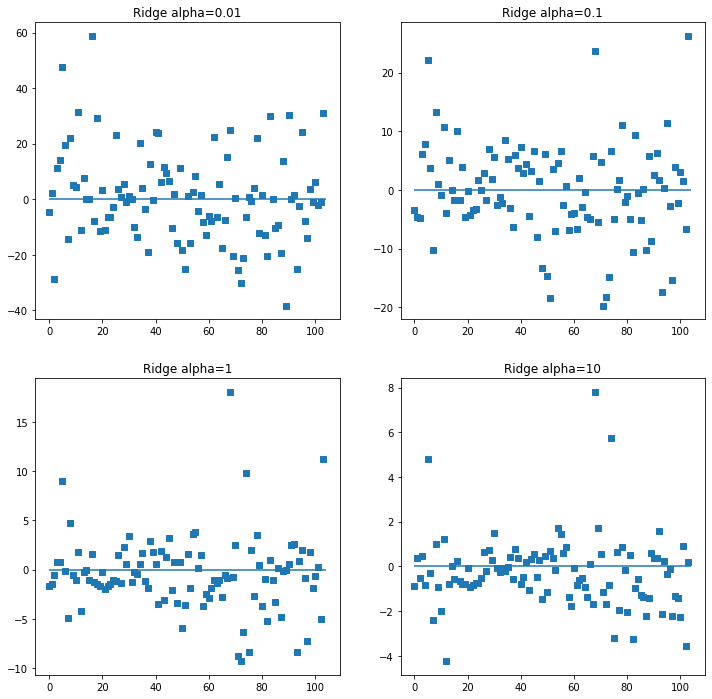

In [82]:
fig = plt.figure(figsize=(12,12))

plt.subplot(2, 2, 1)
plt.hlines(0,0, len(ridge001.coef_))
plt.plot(ridge001.coef_, 's', label="Ridge alpha=0.01")
plt.title('Ridge alpha=0.01')

plt.subplot(2, 2, 2)
plt.hlines(0,0, len(ridge01.coef_))
plt.plot(ridge01.coef_, 's', label="Ridge alpha=0.1")
plt.title('Ridge alpha=0.1')

plt.subplot(2, 2, 3)
plt.hlines(0,0, len(ridge1.coef_))
plt.plot(ridge1.coef_, 's', label="Ridge alpha=1")
plt.title('Ridge alpha=1')

plt.subplot(2, 2, 4)
plt.hlines(0,0, len(ridge10.coef_))
plt.plot(ridge10.coef_, 's', label="Ridge alpha=10")
plt.title('Ridge alpha=10')

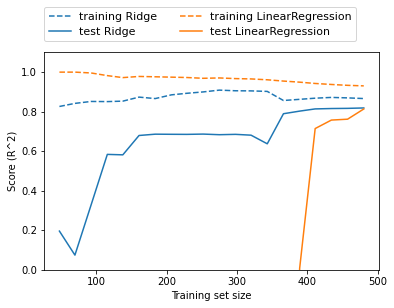

In [83]:
mglearn.plots.plot_ridge_n_samples()

In [85]:
from sklearn.linear_model import Lasso
import numpy as np

In [91]:
lasso = Lasso(alpha=0.01).fit(X_train, y_train)
print("훈련 데이터 세트 점수 : {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.2f}".format(lasso.score(X_test, y_test)))

훈련 데이터 세트 점수 : 0.89
테스트 데이터 세트 점수 : 0.80


C:\Users\front\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.848133364149362, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(


In [92]:
lasso.coef_

array([ -0.        ,   0.        ,  -0.        ,   0.49378944,
        -0.        ,   1.01292903,  -0.        ,  -8.15121681,
        15.53835228,   0.        ,  -0.        ,   2.01205527,
       -10.95666719,  -0.        ,  -0.        ,  -0.        ,
         0.        ,  -0.        ,  -0.        ,  -0.        ,
        -0.        ,  -8.98728378,  -0.        ,  -0.        ,
        -0.        ,  -0.        ,   1.67412632,  -0.        ,
         0.        ,  -0.        ,   0.        ,  -0.        ,
         0.        ,  -0.        ,   0.        ,   0.        ,
         0.        ,  -0.        ,   0.44944269,   0.        ,
         0.        ,  -0.        ,   0.        ,  -0.        ,
         0.        ,   6.4784223 ,  -0.        ,   0.        ,
        -0.        ,   0.21747255,  -7.62536972,  -3.27364254,
         0.43514756,  -0.        ,   0.        ,   9.7760493 ,
         0.        ,   2.25574786,  -0.        ,  -2.88435219,
        -0.08285273,  -0.        ,  -0.        ,  -0.  

In [93]:
lasso00001 = Lasso(alpha=0.0001, max_iter=1000).fit(X_train, y_train)
print("훈련 데이터 세트 점수 : ",lasso00001.score(X_train, y_train))
print("테스트 데이터 세트 점수 : ",lasso00001.score(X_test, y_test))
print("사용한 특성의 수 : ", np.sum(lasso00001.coef_ != 0))

훈련 데이터 세트 점수 :  0.9435815252488565
테스트 데이터 세트 점수 :  0.8080525356174253
사용한 특성의 수 :  95


In [94]:
lasso001 = Lasso(alpha=0.01, max_iter=1000).fit(X_train, y_train)
print("훈련 데이터 세트 점수 : ",lasso001.score(X_train, y_train))
print("테스트 데이터 세트 점수 : ",lasso001.score(X_test, y_test))
print("사용한 특성의 수 : ", np.sum(lasso001.coef_ != 0))

훈련 데이터 세트 점수 :  0.8864717420585476
테스트 데이터 세트 점수 :  0.8036004116583615
사용한 특성의 수 :  34


In [95]:
lasso01 = Lasso(alpha=0.1, max_iter=1000).fit(X_train, y_train)
print("훈련 데이터 세트 점수 : ",lasso01.score(X_train, y_train))
print("테스트 데이터 세트 점수 : ",lasso01.score(X_test, y_test))
print("사용한 특성의 수 : ", np.sum(lasso01.coef_ != 0))

훈련 데이터 세트 점수 :  0.7471467575228325
테스트 데이터 세트 점수 :  0.6986891802234085
사용한 특성의 수 :  12


In [97]:
lasso1 = Lasso(alpha=1, max_iter=1000).fit(X_train, y_train)
print("훈련 데이터 세트 점수 : ",lasso1.score(X_train, y_train))
print("테스트 데이터 세트 점수 : ",lasso1.score(X_test, y_test))
print("사용한 특성의 수 : ", np.sum(lasso1.coef_ != 0))

훈련 데이터 세트 점수 :  0.26783778369518485
테스트 데이터 세트 점수 :  0.2599232118344591
사용한 특성의 수 :  3


In [98]:
lasso10 = Lasso(alpha=10, max_iter=100000).fit(X_train, y_train)
print("훈련 데이터 세트 점수 : ",lasso10.score(X_train, y_train))
print("테스트 데이터 세트 점수 : ",lasso10.score(X_test, y_test))
print("사용한 특성의 수 : ", np.sum(lasso10.coef_ != 0))

훈련 데이터 세트 점수 :  0.0
테스트 데이터 세트 점수 :  -0.03189647654769301
사용한 특성의 수 :  0


C:\Users\front\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\front\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\front\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\front\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47197 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\front\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\front\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from c

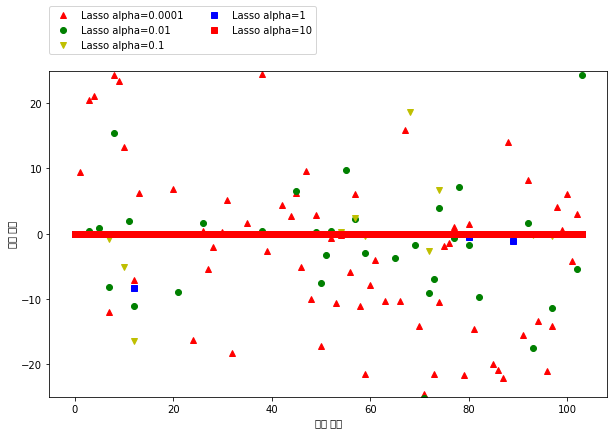

In [102]:
plt.figure(figsize=(10,6))
plt.plot(lasso00001.coef_, "r^", label="Lasso alpha=0.0001")
plt.plot(lasso001.coef_, 'go', label="Lasso alpha=0.01")
plt.plot(lasso01.coef_, 'yv', label="Lasso alpha=0.1")
plt.plot(lasso1.coef_, "bs", label="Lasso alpha=1")
plt.plot(lasso10.coef_, "rs", label="Lasso alpha=10")

plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0,1.05))
plt.show()

### 분류형 선형모델

### REF
 * https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import mglearn
import matplotlib.pyplot as plt

In [104]:
X, y = mglearn.datasets.make_forge()
X.shape, y.shape

C:\Users\front\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


((26, 2), (26,))

In [105]:
model1 = LogisticRegression().fit(X, y)
model2 = LinearSVC().fit(X, y)

C:\Users\front\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


C:\Users\front\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


C:\Users\front\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\front\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\front\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\front\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


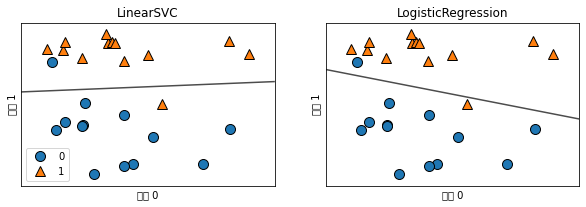

In [106]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title(clf. __class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()

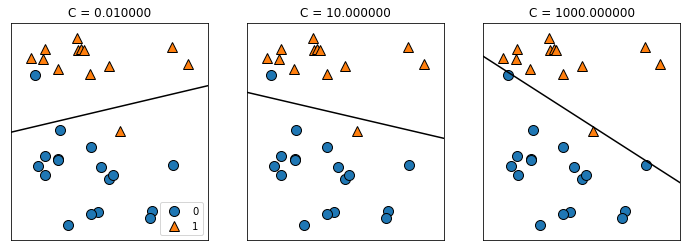

In [107]:
mglearn.plots.plot_linear_svc_regularization()